# **Healthcare Patient Data Analysis**

**Dataset Description-**

This healthcare dataset contains 55,500 patient records with 15 variables, representing hospital admission and treatment information. The data appears to be structured, tabular, and real-world–oriented, suitable for exploratory data analysis, statistical analysis, and machine learning tasks.

Dataset Shape

* Rows: 55,500
* Columns: 15

| Column Name        | Description                                                   |
| ------------------ | ------------------------------------------------------------- |
| Name               | Patient’s full name                                           |
| Age                | Age of the patient (numeric)                                  |
| Gender             | Gender of the patient (Male/Female)                           |
| Blood Type         | Blood group (A+, A-, B+, B-, O+, O-, AB+, AB-)                |
| Medical Condition  | Primary diagnosed condition (e.g., Cancer, Diabetes, Obesity) |
| Date of Admission  | Hospital admission date                                       |
| Doctor             | Attending doctor’s name                                       |
| Hospital           | Hospital name                                                 |
| Insurance Provider | Health insurance company                                      |
| Billing Amount     | Total hospital billing cost                                   |
| Room Number        | Assigned hospital room                                        |
| Admission Type     | Type of admission (Emergency, Urgent, Elective)               |
| Discharge Date     | Date of patient discharge                                     |
| Medication         | Prescribed medication                                         |
| Test Results       | Medical test outcome (Normal, Abnormal, Inconclusive)         |


**Data Characteristics-**

* Contains both categorical and numerical features

* Includes date-time variables useful for time-based analysis

* Suitable for:

    * Classification (e.g., predicting test results)

    * Statistical analysis (billing, age distribution)

    * Healthcare trend analysis

* Large dataset size improves model generalization

**Possible Target Variables-**

* Test Results

* Medical Condition

* Admission Type

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Project Objective**

The primary objective of this project is to analyze and prepare a healthcare patient dataset for machine learning applications by performing systematic data preprocessing, exploratory data analysis, and feature understanding. The project aims to identify meaningful patterns and relationships among patient demographics, medical conditions, admission details, and billing information that can support predictive modeling.

Additionally, this study seeks to establish a strong foundation for supervised machine learning tasks such as classification and regression. By transforming the raw healthcare data into a model-ready format, the project enables the development of predictive models for outcomes such as medical test results, admission types, and healthcare costs. The overall goal is to demonstrate an end-to-end data science workflow that supports data-driven decision-making in the healthcare domain.

In [441]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

# 1. Load Dataset

In [442]:
df = pd.read_csv('healthcare_dataset.csv')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


# 2. Exploratory Data Analysis (EDA)

In this notebook, we will conduct a comprehensive analysis of the Healthcare dataset. Our goals are to:
1. Basic Information and Data Cleaning check.
2. Univariate Analysis.
3. Bivariate Analysis.
4. Time Series Analysis.
5. Correlation Analysis.
6. Hypothesis Testing.

## a. Basic Information & Data Cleaning Check

In [443]:
df.info()
missing_count = df.isnull().sum()
missing_ratio = (missing_count / len(df)) * 100
missing_ratio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

Name                  0.0
Age                   0.0
Gender                0.0
Blood Type            0.0
Medical Condition     0.0
Date of Admission     0.0
Doctor                0.0
Hospital              0.0
Insurance Provider    0.0
Billing Amount        0.0
Room Number           0.0
Admission Type        0.0
Discharge Date        0.0
Medication            0.0
Test Results          0.0
dtype: float64

In [444]:
df.duplicated().sum()

np.int64(534)

In [445]:
df.drop_duplicates(inplace=True)

In [446]:
df.duplicated().sum()

np.int64(0)

In [447]:
df.describe()

,Age,Billing Amount,Room Number
count,54966.000000,54966.000000,54966.000000
mean,51.535185,25544.306284,301.124404
std,19.605661,14208.409711,115.223143
min,13.000000,-2008.492140,101.000000
25%,35.000000,13243.718641,202.000000
50%,52.000000,25542.749145,302.000000
75%,68.000000,37819.858159,401.000000
max,89.000000,52764.276736,500.000000


In [448]:
df.describe(include='all')

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
count,54966,54966.000000,54966,54966,54966,54966,54966,54966,54966,54966.000000,54966.000000,54966,54966,54966,54966
unique,49992,NaN,2,8,6,1827,40341,39876,5,NaN,NaN,3,1856,5,3
top,DAvId muNoZ,NaN,Male,A-,Arthritis,2024-03-16,Michael Smith,LLC Smith,Cigna,NaN,NaN,Elective,2020-03-15,Lipitor,Abnormal
freq,3,NaN,27496,6898,9218,50,27,44,11139,NaN,NaN,18473,53,11038,18437
mean,NaN,51.535185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25544.306284,301.124404,NaN,NaN,NaN,NaN
std,NaN,19.605661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14208.409711,115.223143,NaN,NaN,NaN,NaN
min,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2008.492140,101.000000,NaN,NaN,NaN,NaN
25%,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13243.718641,202.000000,NaN,NaN,NaN,NaN
50%,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25542.749145,302.000000,NaN,NaN,NaN,NaN
75%,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37819.858159,401.000000,NaN,NaN,NaN,NaN


## b. Univariate Analysis
Analyzing one variable at a time.

### Numerical Variables

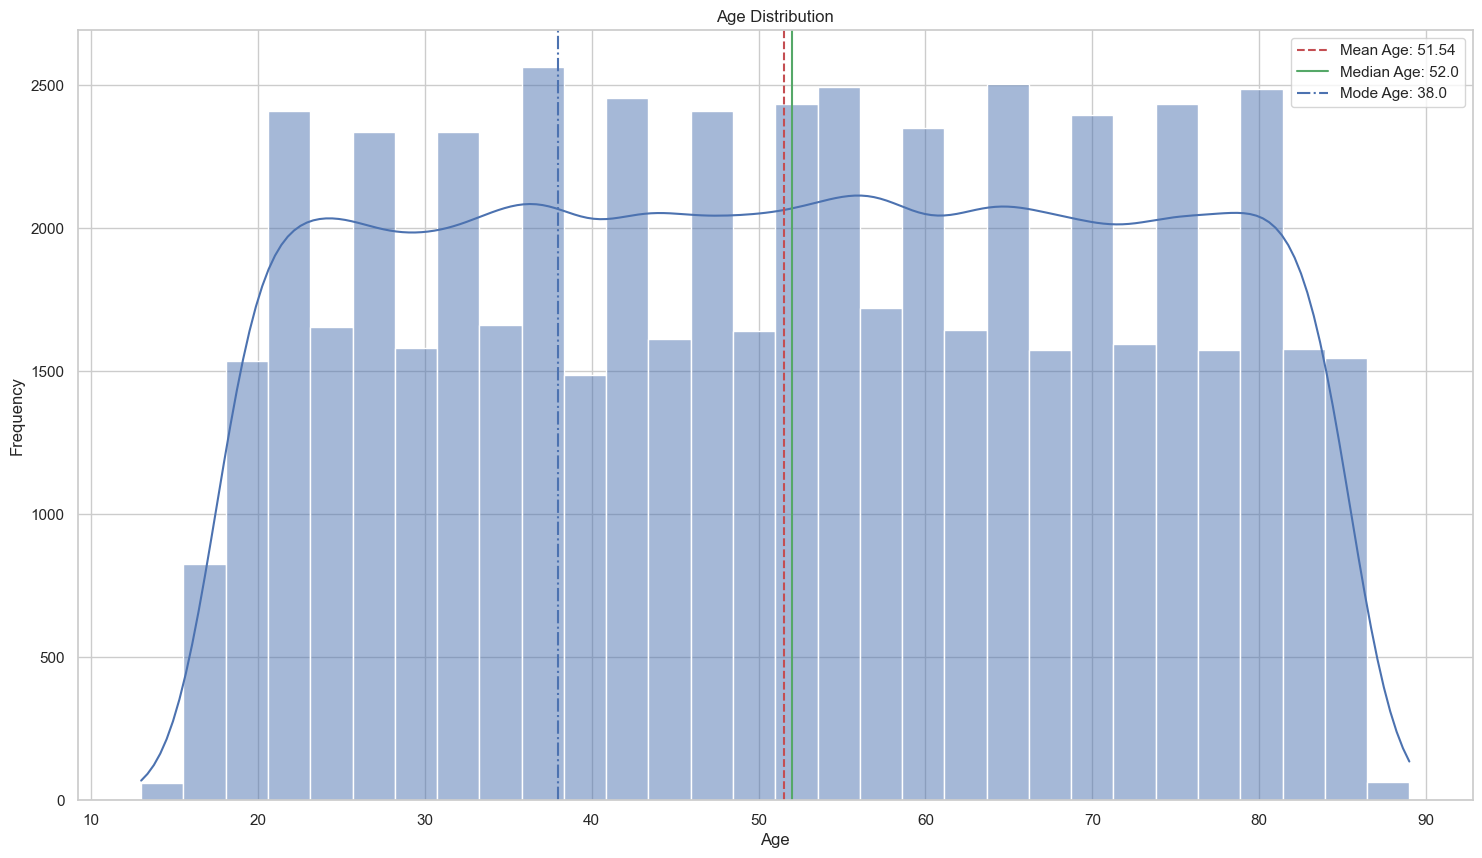

In [449]:
plt.figure(figsize=(18,10))
sns.histplot(df['Age'], bins=30, kde=True)

mean_age = df['Age'].mean()
median_age = df['Age'].median()
mode_age = df['Age'].mode()[0]

plt.axvline(mean_age, color='r', linestyle='--', label=f'Mean Age: {mean_age:.2f}')
plt.axvline(median_age, color='g', linestyle='-', label=f'Median Age: {median_age:.1f}')
plt.axvline(mode_age, color='b', linestyle='-.', label=f'Mode Age: {mode_age:.1f}')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Most ages fall between 18 and 85.

* Mean age ≈ 51.5 (red dashed line)

* Median age = 52 (green line)

* Mode age = 38 (blue dashed line)

The distribution is fairly spread out, with a slight concentration around middle age.

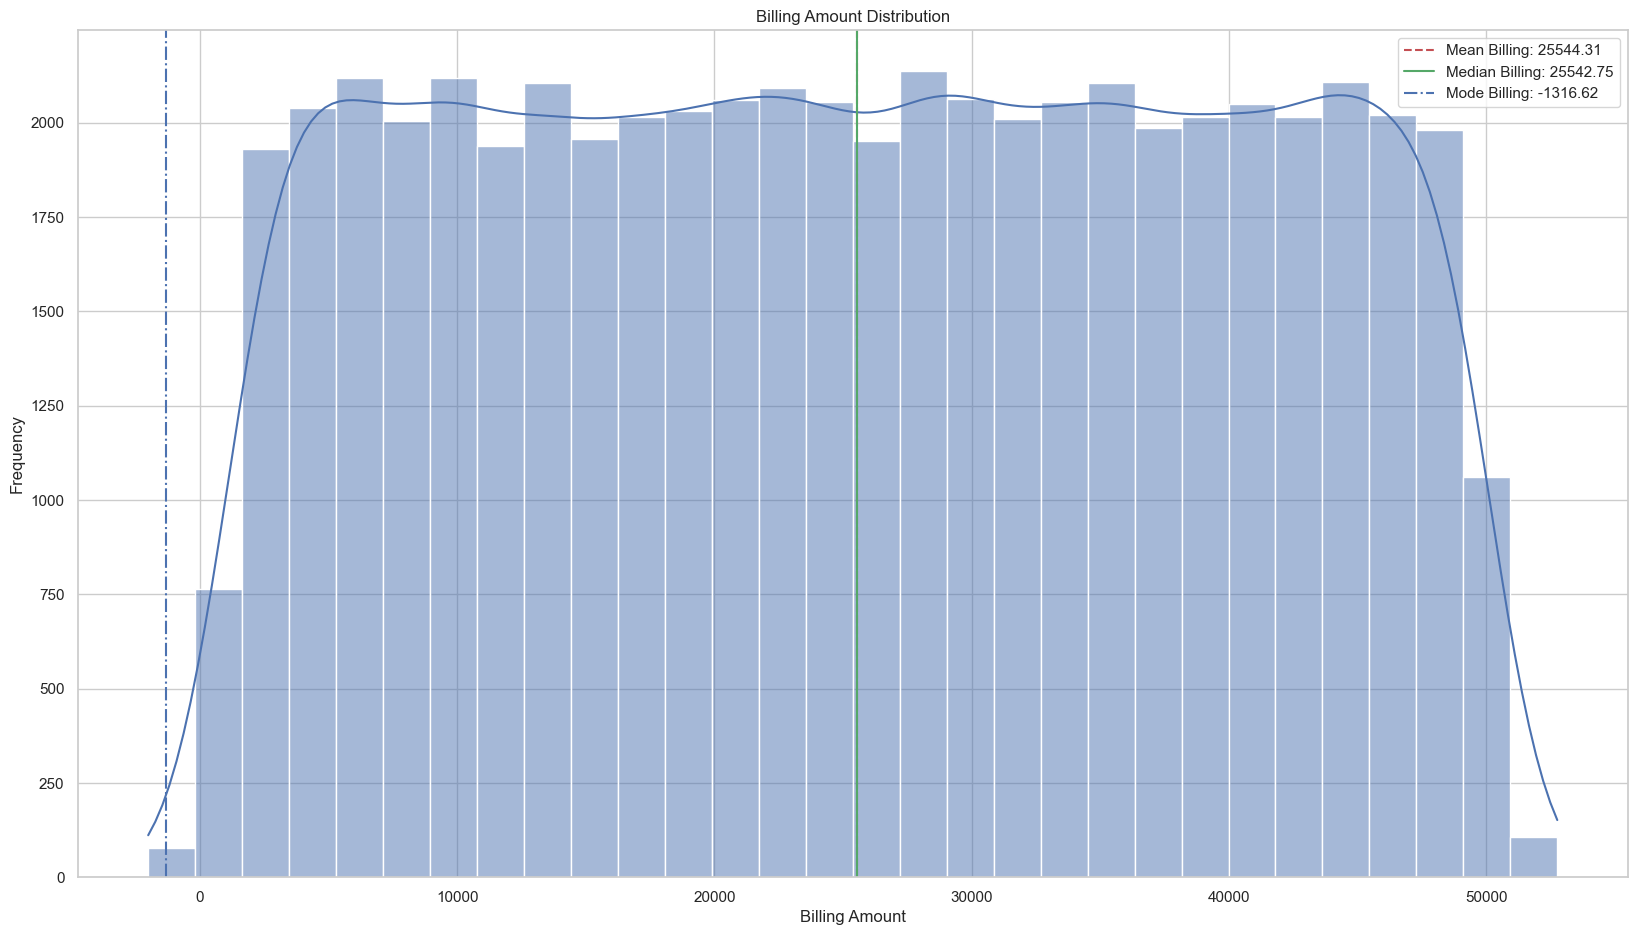

In [450]:
plt.figure(figsize=(20,11))
sns.histplot(df['Billing Amount'], bins=30, kde=True)

mean_billing = df['Billing Amount'].mean()
median_billing = df['Billing Amount'].median()
mode_billing = df['Billing Amount'].mode()[0]

plt.axvline(mean_billing, color='r', linestyle='--', label=f'Mean Billing: {mean_billing:.2f}')
plt.axvline(median_billing, color='g', linestyle='-', label=f'Median Billing: {median_billing:.2f}')
plt.axvline(mode_billing, color='b', linestyle='-.', label=f'Mode Billing: {mode_billing:.2f}')

plt.title('Billing Amount Distribution')
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')
plt.legend()

Most bills are spread across a wide range up to about 50,000.

* Mean ≈ 25,544 (red dashed line)

* Median ≈ 25,543 (green line)

* Mode ≈ –1,317 (blue dashed line, likely due to data noise or outliers)

Overall, billing amounts are widely and fairly evenly distributed.

### Categorical Variables

In [451]:
df['Gender'].value_counts().sort_values(ascending=False)

Gender
Male      27496
Female    27470
Name: count, dtype: int64

Text(0, 0.5, '')

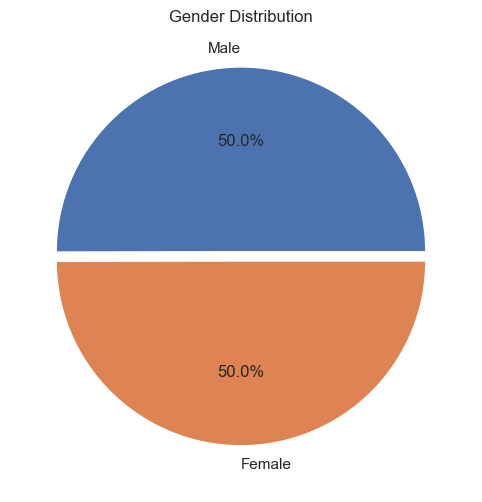

In [452]:
plt.figure(figsize=(10,6))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', explode=[0.05, 0])
plt.title('Gender Distribution')
plt.ylabel('')

This chart shows a perfectly balanced gender distribution with 50% male and 50% female representation.

In [453]:
df['Blood Type'].value_counts().sort_values(ascending=False)

Blood Type
A-     6898
A+     6896
B+     6885
AB+    6882
AB-    6874
B-     6872
O+     6855
O-     6804
Name: count, dtype: int64

C:\Users\Jayed Islam\AppData\Local\Temp\ipykernel_5188\434253034.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Blood Type', data=df, order=df['Blood Type'].value_counts().index, palette='tab10')


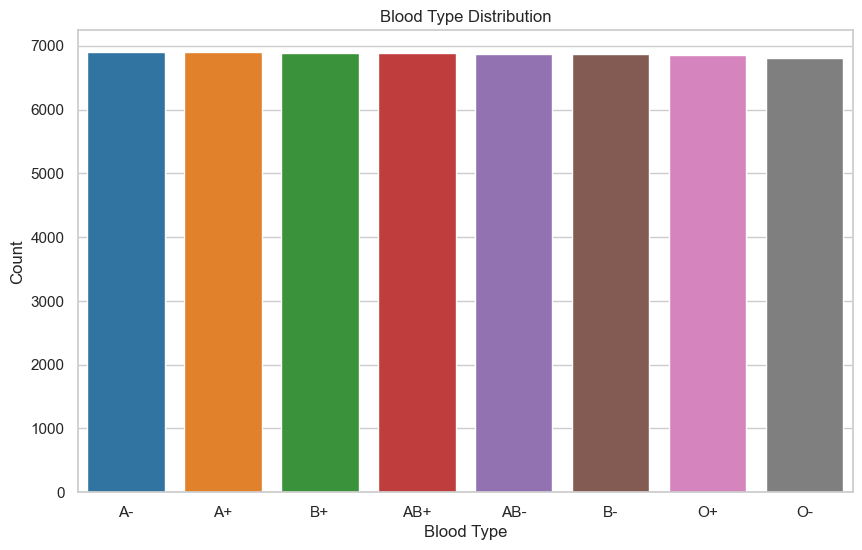

In [454]:
plt.figure(figsize=(10,6))
sns.countplot(x='Blood Type', data=df, order=df['Blood Type'].value_counts().index, palette='tab10')
plt.title('Blood Type Distribution')
plt.xlabel('Blood Type')
plt.ylabel('Count')
plt.show()

This chart shows an equal distribution of all eight blood types (A-, A+, B+, AB+, AB-, B-, O+, O-), with each type having approximately 6,900 counts.

In [455]:
df['Medical Condition'].value_counts().sort_values(ascending=False)

Medical Condition
Arthritis       9218
Diabetes        9216
Hypertension    9151
Obesity         9146
Cancer          9140
Asthma          9095
Name: count, dtype: int64

C:\Users\Jayed Islam\AppData\Local\Temp\ipykernel_5188\3269698183.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Medical Condition', data=df, order=df['Medical Condition'].value_counts().index, palette='tab10')


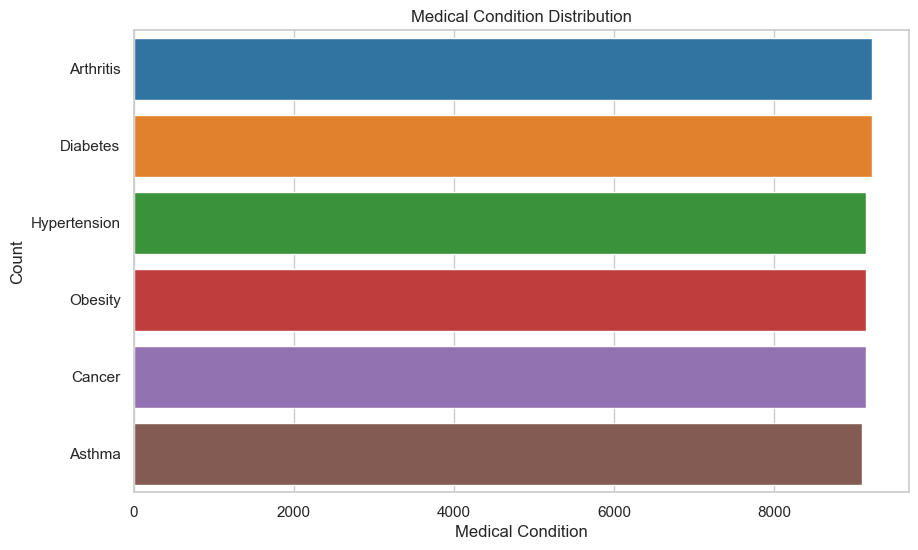

In [456]:
plt.figure(figsize=(10,6))
sns.countplot(y='Medical Condition', data=df, order=df['Medical Condition'].value_counts().index, palette='tab10')
plt.title('Medical Condition Distribution')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.xticks()
plt.show()

This chart displays the distribution of six medical conditions. All conditions (Arthritis, Diabetes, Hypertension, Obesity, Cancer, and Asthma) show nearly equal prevalence, with counts around 9,000 each.

In [457]:
df['Test Results'].value_counts().sort_values(ascending=False)

Test Results
Abnormal        18437
Normal          18331
Inconclusive    18198
Name: count, dtype: int64

C:\Users\Jayed Islam\AppData\Local\Temp\ipykernel_5188\3655051622.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Test Results', data=df, order=df['Test Results'].value_counts().index, palette='tab10')


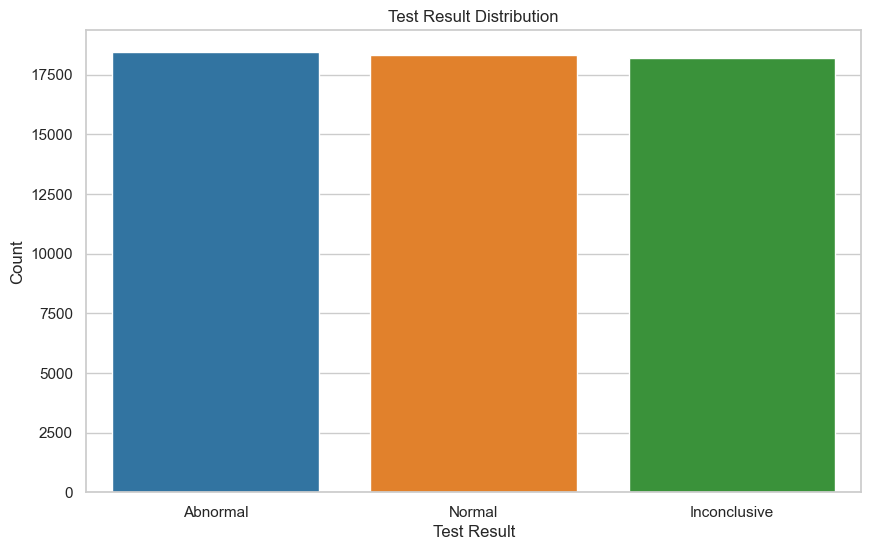

In [458]:
plt.figure(figsize=(10,6))
sns.countplot(x='Test Results', data=df, order=df['Test Results'].value_counts().index, palette='tab10')
plt.title('Test Result Distribution')
plt.xlabel('Test Result')
plt.ylabel('Count')
plt.show()

The test results show a balanced distribution across all three categories. Abnormal, Normal, and Inconclusive results each account for approximately one-third of the total, with counts around 18,000-18,500 each. This indicates no significant dominance of any particular test outcome.

In [459]:
df['Insurance Provider'].value_counts().sort_values(ascending=False)

Insurance Provider
Cigna               11139
Medicare            11039
UnitedHealthcare    11014
Blue Cross          10952
Aetna               10822
Name: count, dtype: int64

C:\Users\Jayed Islam\AppData\Local\Temp\ipykernel_5188\2174743733.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Insurance Provider', data=df, order=df['Insurance Provider'].value_counts().index, palette='tab10')


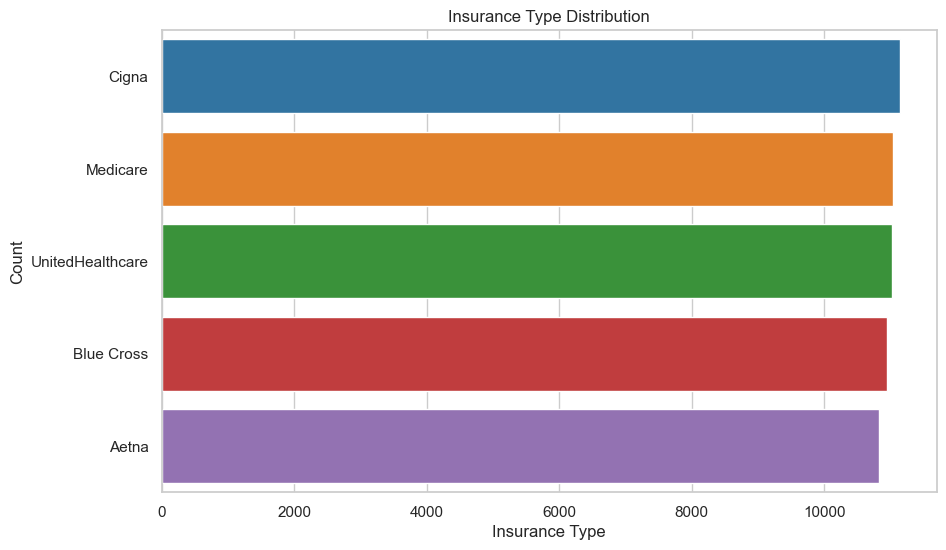

In [460]:
plt.figure(figsize=(10,6))
sns.countplot(y='Insurance Provider', data=df, order=df['Insurance Provider'].value_counts().index, palette='tab10')
plt.title('Insurance Type Distribution')
plt.xlabel('Insurance Type')
plt.ylabel('Count')
plt.show()

The insurance type distribution shows relatively balanced coverage across five major providers. Cigna leads slightly with around 11,000 members, followed closely by Medicare, UnitedHealthcare, Blue Cross, and Aetna, each with approximately 10,500-11,000 members. The distribution indicates diverse insurance representation with no single provider dominating the market.

## c. Bivariate Analysis
Exploring relationships between variables.

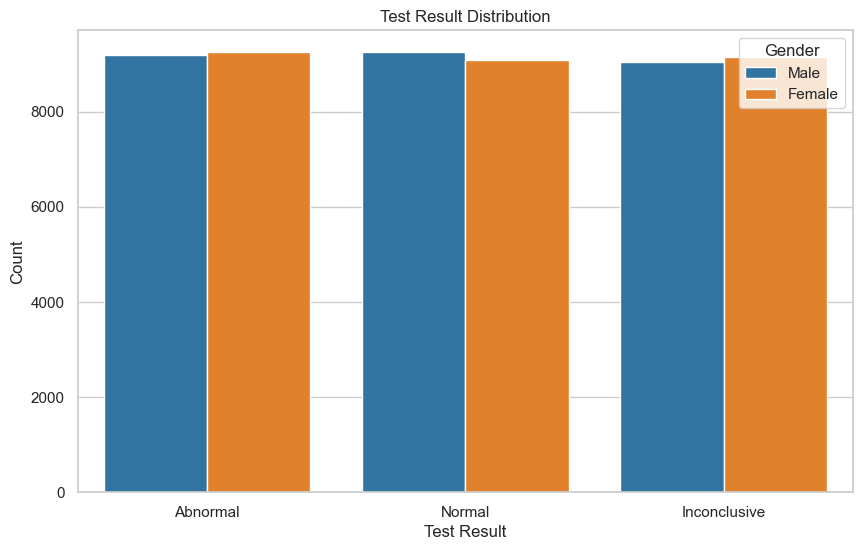

In [461]:
plt.figure(figsize=(10,6))
sns.countplot(x='Test Results', data=df, hue='Gender', order=df['Test Results'].value_counts().index, palette='tab10')
plt.title('Test Result Distribution')
plt.xlabel('Test Result')
plt.ylabel('Count')
plt.show()

The test results show an equal distribution across all categories by gender. Both males and females have approximately 9,000 cases each in Abnormal, Normal, and Inconclusive results. This indicates balanced testing outcomes with no gender bias, and all three result types occur at similar rates regardless of gender.

In [462]:
ct = pd.crosstab(df['Medical Condition'], df['Test Results'])
ct

Test Results,Abnormal,Inconclusive,Normal
Medical Condition,,,
Arthritis,3156,3062,3000
Asthma,2980,2999,3116
Cancer,3089,3033,3018
Diabetes,3131,3024,3061
Hypertension,2977,3068,3106
Obesity,3104,3012,3030


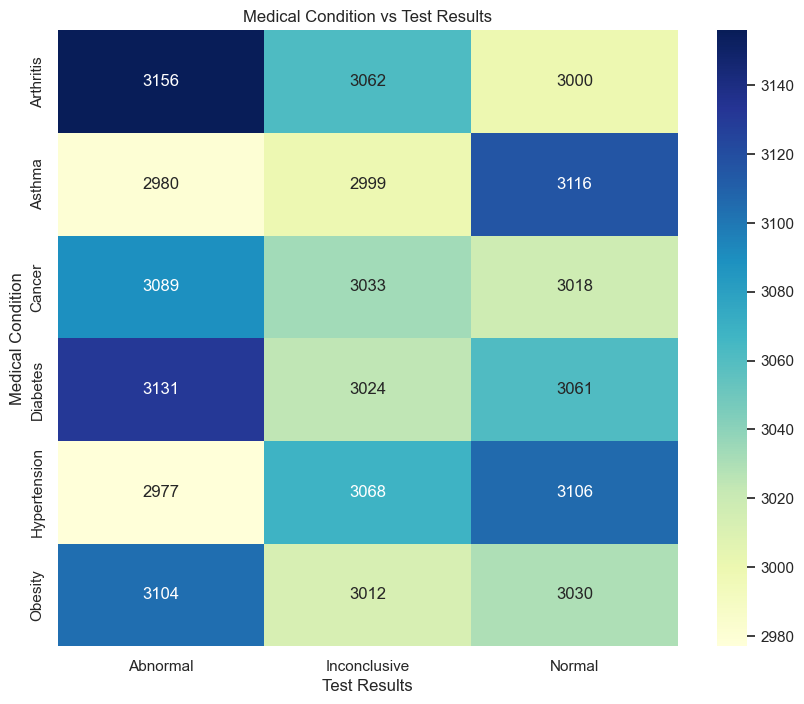

In [463]:
plt.figure(figsize=(10,8))
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Medical Condition vs Test Results')
plt.show()

This heatmap shows the relationship between six medical conditions and their test results (Abnormal, Inconclusive, Normal). The distribution is remarkably balanced, with each condition showing approximately 3,000 cases across all three test result categories. Notable patterns include Arthritis showing slightly higher abnormal results (3,156) and Asthma showing more normal results (3,116). Overall, the data suggests no strong correlation between specific conditions and particular test outcomes.

C:\Users\Jayed Islam\AppData\Local\Temp\ipykernel_5188\1181962141.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Medical Condition', y='Age', data=df, palette='tab10')


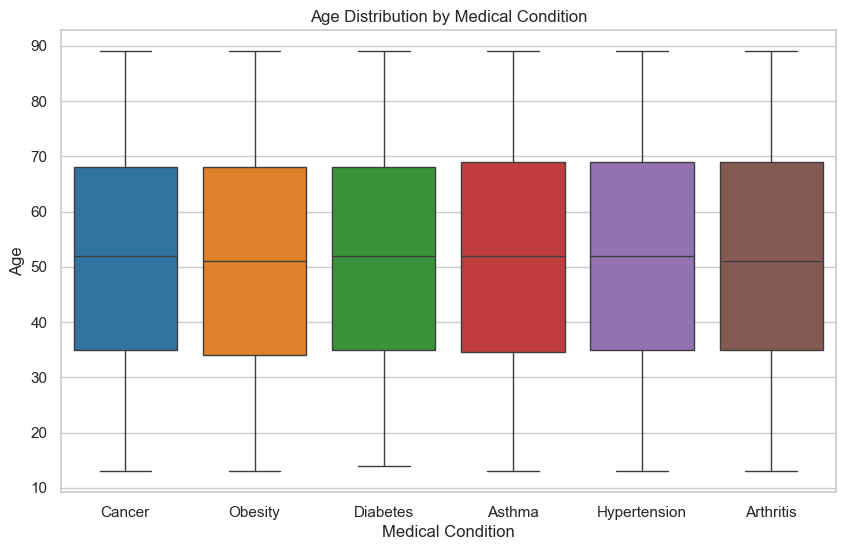

In [464]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Medical Condition', y='Age', data=df, palette='tab10')
plt.title('Age Distribution by Medical Condition')
plt.show()

This box plot shows age distribution across six medical conditions. All conditions display remarkably similar patterns with median ages around 50-52 years and age ranges spanning from approximately 13 to 89 years. The interquartile ranges (boxes) are nearly identical across all conditions, indicating that these medical conditions affect people fairly uniformly across age groups. There's no significant variation in age distribution between different conditions, suggesting these health issues occur across a broad age spectrum without preference for specific age groups.

C:\Users\Jayed Islam\AppData\Local\Temp\ipykernel_5188\1314167044.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Admission Type', y='Billing Amount', data=df, palette='tab10')


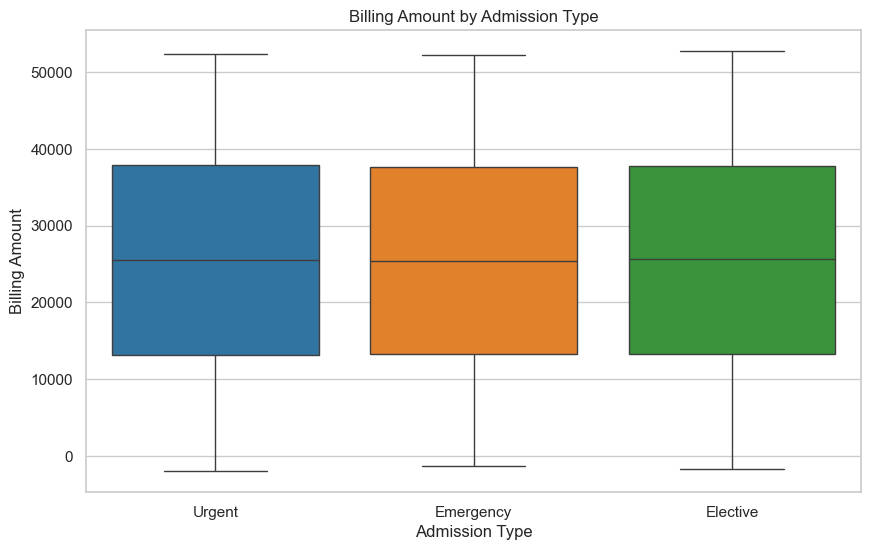

In [465]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Admission Type', y='Billing Amount', data=df, palette='tab10')
plt.title('Billing Amount by Admission Type')
plt.show()

This box plot compares billing amounts across three admission types: Urgent, Emergency, and Elective. All three categories show nearly identical distributions with median billing amounts around $25,000. The interquartile ranges span from approximately $14,000 to $38,000, with outliers extending up to about $53,000. The similarity across admission types suggests that billing amounts are consistent regardless of how patients are admitted, indicating standardized pricing structures across different admission pathways.

## d. Time Series Analysis

In [466]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Month_Year'] = df['Date of Admission'].dt.to_period('M')
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Month_Year
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2024-01
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,2019-08
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,2022-09
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,2020-11
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,2022-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal,2020-08
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal,2020-01
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal,2020-07
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal,2019-05


In [467]:
admission_Trend = df['Month_Year'].value_counts().sort_index()
admission_Trend

Month_Year
2019-05    677
2019-06    899
2019-07    951
2019-08    985
2019-09    924
          ... 
2024-01    903
2024-02    869
2024-03    902
2024-04    941
2024-05    212
Freq: M, Name: count, Length: 61, dtype: int64

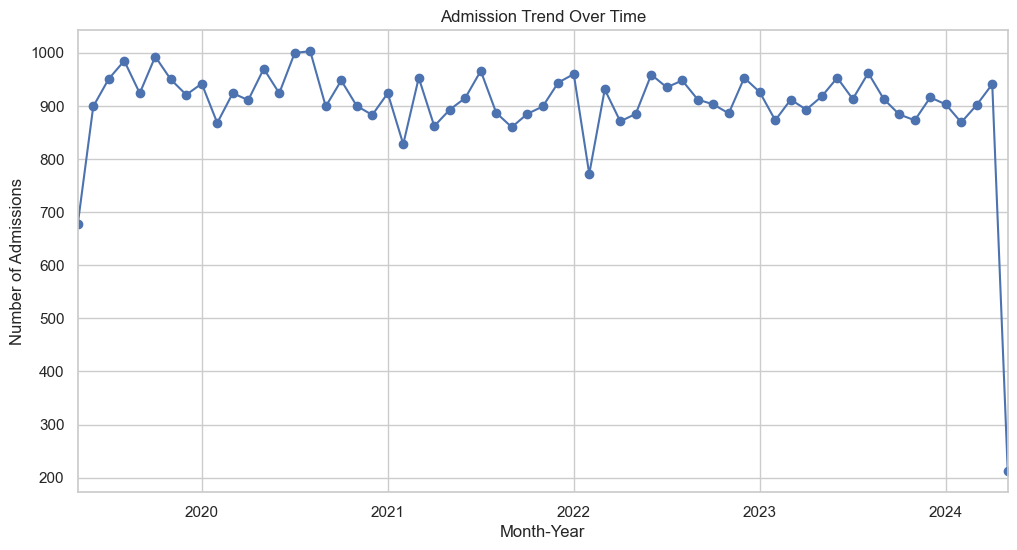

In [468]:
plt.figure(figsize=(12,6))
admission_Trend.plot(kind='line',marker='o',color='b')
plt.title('Admission Trend Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Admissions')
plt.show()

This line chart shows hospital admission trends from 2019 to 2024. Admissions started at around 675 in early 2019, then rapidly increased to stabilize between 850-1,000 admissions per month throughout most of the period. The data shows consistent fluctuations around 900 admissions with occasional peaks reaching 1,000 and dips to around 775. Notably, there's a dramatic drop to approximately 200 admissions at the end of 2024, which may indicate incomplete data for that period or a significant disruption event.

## e. Correlation Analysis

<Axes: >

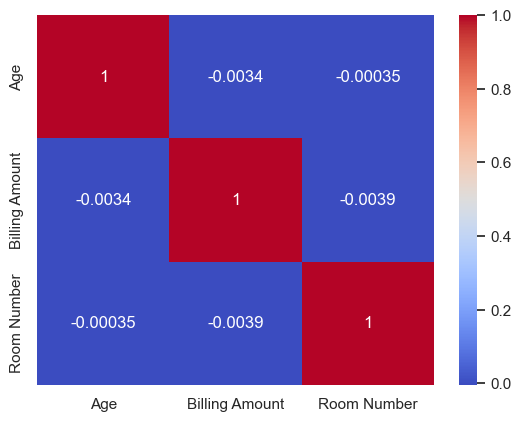

In [469]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

This correlation matrix reveals relationships between Age, Billing Amount, and Room Number. The diagonal shows perfect correlation (1.0) where each variable correlates with itself. The off-diagonal values show very weak negative correlations (around -0.003 to -0.004) between all three variables. This indicates that Age, Billing Amount, and Room Number are essentially independent of each other, with no meaningful linear relationship between them. Patients' ages don't predict their billing amounts or room assignments, and room numbers don't correlate with costs.

## f. Hypothesis Testing

In [470]:
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from scipy.stats import pearsonr

### t-test

In [471]:
# t-test between Gender and Age
male_ages = df[df['Gender']=='Male']['Age']
female_ages = df[df['Gender']=='Female']['Age']

t_stat, p_value = ttest_ind(male_ages,female_ages)

In [472]:
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -0.5884675293750375, P-value: 0.5562209405311589


Interpretation:

* p < 0.05 → There is a significant difference.

* p ≥ 0.05 → There is no difference.

### Chi-square test 

In [473]:
## Chi-square test between Gender and Test Results
table = pd.crosstab(df['Gender'], df['Test Results'])

chi2, p, dof, ex = chi2_contingency(table)

In [474]:
print(f"Chi-square Statistic: {chi2}, P-value: {p}")

Chi-square Statistic: 2.1846316308915408, P-value: 0.33543877922666065


Interpretation

* p < 0.05 → Significant relationship.

* p ≥ 0.05 → Not significant.

### ANOVA test 

In [475]:
# ANOVA test between Admission Type and Billing Amount
a = df[df['Admission Type']=='Emergency']['Billing Amount']
b = df[df['Admission Type']=='Urgent']['Billing Amount']
c = df[df['Admission Type']=='Elective']['Billing Amount']

f_stat, p_val = f_oneway(a,b,c)

In [476]:
print(f"F-statistic: {f_syat}, P-value: {p_val}")

F-statistic: nan, P-value: 0.7268780207253354


### Correlation test → relationship strength

In [477]:
# Correlation test → relationship strength between Age and Billing Amount
corr, p_val = pearsonr(df['Age'], df['Billing Amount'])

In [478]:
print(f"Pearson Correlation: {corr}, P-value: {p_val}")

Pearson Correlation: -0.0034267004174612214, P-value: 0.4217619862741638


Interpretation

* Correlation value

    * +1 → strong positive

    * 0 → no relationship

    * −1 → strong negative

* p < 0.05 → relationship significant

# 3. Data Transformation 

In [479]:
cols_to_drop = ['Name', 'Date of Admission', 'Doctor', 'Hospital', 'Room Number', 'Discharge Date', 'Month_Year']
df = df.drop(columns=cols_to_drop)

In [480]:
df.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results
0,30,Male,B-,Cancer,Blue Cross,18856.281306,Urgent,Paracetamol,Normal
1,62,Male,A+,Obesity,Medicare,33643.327287,Emergency,Ibuprofen,Inconclusive
2,76,Female,A-,Obesity,Aetna,27955.096079,Emergency,Aspirin,Normal
3,28,Female,O+,Diabetes,Medicare,37909.782410,Elective,Ibuprofen,Abnormal
4,43,Female,AB+,Cancer,Aetna,14238.317814,Urgent,Penicillin,Abnormal


In [481]:
df.columns.tolist()

['Age',
 'Gender',
 'Blood Type',
 'Medical Condition',
 'Insurance Provider',
 'Billing Amount',
 'Admission Type',
 'Medication',
 'Test Results']

In [482]:
from sklearn.preprocessing import LabelEncoder

In [483]:
cat_cols = ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Medication', 'Insurance Provider', 'Test Results']

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results
0,30,1,5,2,1,18856.281306,2,3,2
1,62,1,0,5,3,33643.327287,1,1,1
2,76,0,1,5,0,27955.096079,1,0,2
3,28,0,6,3,3,37909.782410,0,1,0
4,43,0,2,2,0,14238.317814,2,4,0


# 4. Feature Selection

<Axes: >

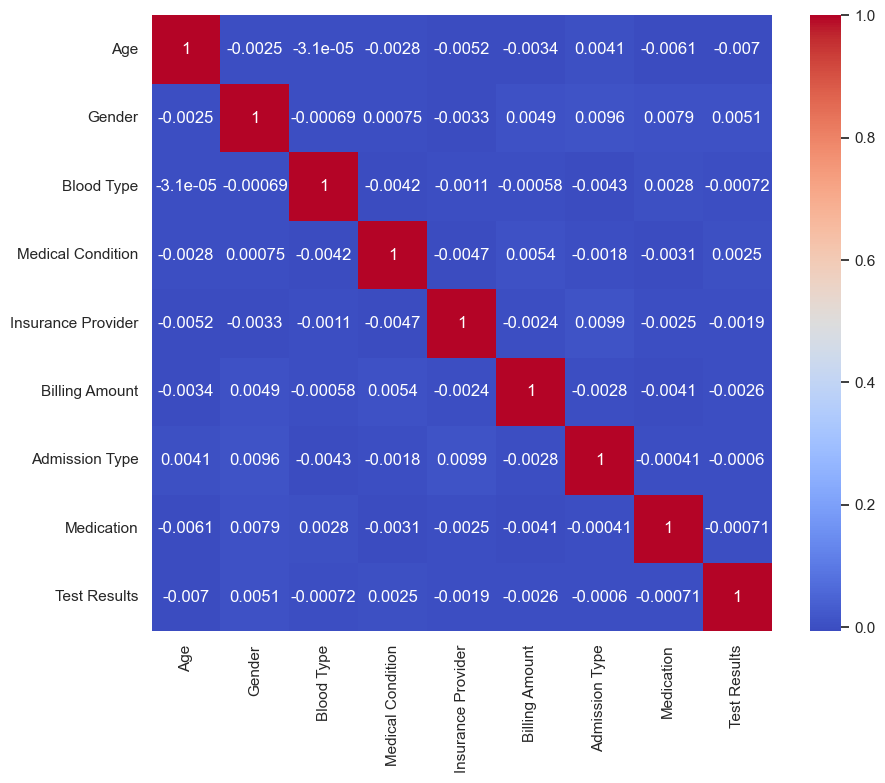

In [484]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

This comprehensive correlation matrix analyzes relationships between nine healthcare variables. The diagonal shows perfect self-correlation (1.0) for each variable. All off-diagonal correlations are extremely weak (ranging from -0.007 to +0.0096), indicating near-zero relationships between variables. This suggests that factors like Age, Gender, Blood Type, Medical Condition, Insurance Provider, Billing Amount, Admission Type, Medication, and Test Results operate independently of each other in this dataset. No variable significantly predicts or influences another, revealing a highly diverse and uncorrelated patient population with varied characteristics and outcomes.

# 5. Data Scaling

In [485]:
from sklearn.preprocessing import StandardScaler

In [486]:
scaler = StandardScaler()

num_cols = ['Age', 'Billing Amount']

df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results
0,-1.098427,1,5,2,1,-0.470713,2,3,2
1,0.533770,1,0,5,3,0.570021,1,1,1
2,1.247856,0,1,5,0,0.169675,1,0,2
3,-1.200439,0,6,3,3,0.870301,0,1,0
4,-0.435347,0,2,2,0,-0.795732,2,4,0


# 6. Variable Transformation

In [487]:
from sklearn.preprocessing import PowerTransformer

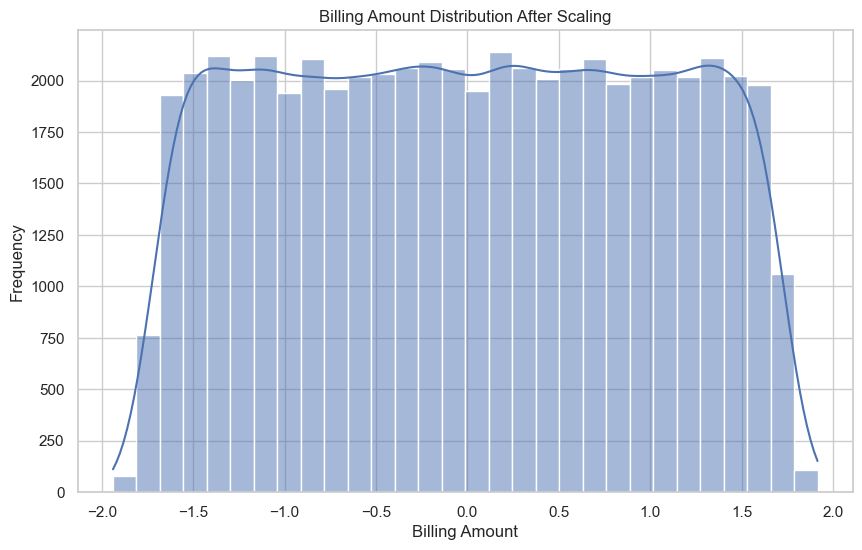

In [488]:
plt.figure(figsize=(10,6))
sns.histplot(df['Billing Amount'], bins=30, kde=True)
plt.title('Billing Amount Distribution After Scaling')
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')
plt.show()

In [489]:
pt = PowerTransformer(method='yeo-johnson')
df['Billing Amount_Transformed'] = pt.fit_transform(df[['Billing Amount']])

df.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Billing Amount_Transformed
0,-1.098427,1,5,2,1,-0.470713,2,3,2,-0.471106
1,0.533770,1,0,5,3,0.570021,1,1,1,0.569689
2,1.247856,0,1,5,0,0.169675,1,0,2,0.169161
3,-1.200439,0,6,3,3,0.870301,0,1,0,0.870205
4,-0.435347,0,2,2,0,-0.795732,2,4,0,-0.795894


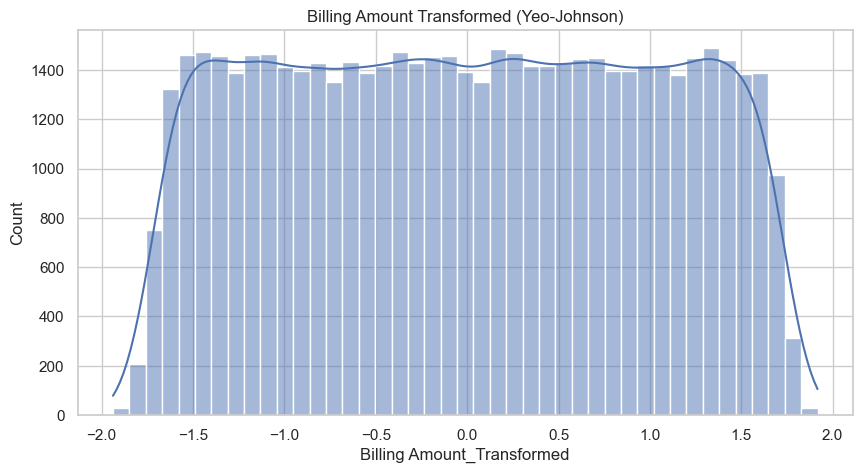

In [490]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Billing Amount_Transformed'], kde=True)
plt.title('Billing Amount Transformed (Yeo-Johnson)')
plt.show()

This histogram displays billing amounts after Yeo-Johnson transformation, a technique used to normalize skewed data. The distribution shows a relatively uniform pattern across the range from -1.5 to +1.5, with each bin containing approximately 1,400 cases. The sharp decline at both extremes (beyond ±1.5) indicates effective outlier management. The Yeo-Johnson transformation has successfully normalized the billing data, creating a more symmetric distribution that's suitable for statistical analysis. This flatter distribution compared to typical normal distributions suggests the original data was quite evenly spread.

# 7. Modeling

In [491]:
from sklearn.model_selection import train_test_split

sns.set(style="whitegrid")
%matplotlib inline

In [492]:
X = df.drop('Test Results', axis=1)
y = df['Test Results']

In [493]:
X

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Billing Amount_Transformed
0,-1.098427,1,5,2,1,-0.470713,2,3,-0.471106
1,0.533770,1,0,5,3,0.570021,1,1,0.569689
2,1.247856,0,1,5,0,0.169675,1,0,0.169161
3,-1.200439,0,6,3,3,0.870301,0,1,0.870205
4,-0.435347,0,2,2,0,-0.795732,2,4,-0.795894
...,...,...,...,...,...,...,...,...,...
55495,-0.486353,0,6,1,1,-1.611285,0,4,-1.610516
55496,0.482764,0,3,5,2,0.416200,0,0,0.415778
55497,-0.690378,0,4,4,4,0.146144,2,1,0.145625
55498,-0.435347,1,7,0,3,0.486110,0,1,0.485726


In [494]:
y

0        2
1        1
2        2
3        0
4        0
        ..
55495    0
55496    2
55497    0
55498    0
55499    0
Name: Test Results, Length: 54966, dtype: int64

In [495]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [496]:
X_train

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Billing Amount_Transformed
9315,1.094837,0,4,4,1,-1.363510,0,3,-1.363069
40648,-0.690378,1,1,2,2,1.534870,0,1,1.535536
50970,0.431758,1,7,0,2,1.631003,0,1,1.631803
15694,0.839807,0,0,0,0,0.484476,1,3,0.484091
38086,1.094837,0,6,1,0,0.353661,2,3,0.353209
...,...,...,...,...,...,...,...,...,...
44732,-1.251445,0,5,2,2,0.173236,0,3,0.172723
54802,-0.486353,0,3,1,1,-1.232577,0,3,-1.232294
38158,-1.404464,0,5,5,4,-1.058651,1,2,-1.058562
860,1.247856,1,0,1,0,-0.881878,1,0,-0.881964


In [497]:
X_test

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Billing Amount_Transformed
47632,0.584776,0,4,5,1,0.943846,2,0,0.943820
28105,0.278739,0,4,1,1,1.135135,0,1,1.135308
22395,0.992825,0,3,5,3,1.479487,2,0,1.480079
47673,-1.404464,0,1,0,0,0.258601,2,3,0.258112
54827,-0.486353,1,6,4,2,-0.629395,2,1,-0.629687
...,...,...,...,...,...,...,...,...,...
39634,-1.098427,1,6,5,0,0.165111,1,0,0.164596
10533,1.349868,0,1,1,2,-0.029852,1,2,-0.030385
22996,-1.047421,0,6,5,0,-1.211281,2,0,-1.211023
17005,-0.129310,1,6,5,3,-0.339542,1,1,-0.340000


In [498]:
y_test

47632    0
28105    0
22395    2
47673    0
54827    2
        ..
39634    2
10533    2
22996    2
17005    2
27101    0
Name: Test Results, Length: 10994, dtype: int64

In [499]:
y_train

9315     2
40648    1
50970    2
15694    0
38086    0
        ..
44732    1
54802    1
38158    1
860      0
15795    2
Name: Test Results, Length: 43972, dtype: int64

## a. Model Training

In [500]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [501]:
models = {

    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(probability=True)
    
}

## b. Model Evaluation

In [502]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score,roc_curve

In [503]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

Logistic Regression Accuracy: 0.3383
Random Forest Accuracy: 0.4242
Support Vector Machine Accuracy: 0.3274


C:\Users\Jayed Islam\AppData\Local\Temp\ipykernel_5188\1837804459.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette='tab10')


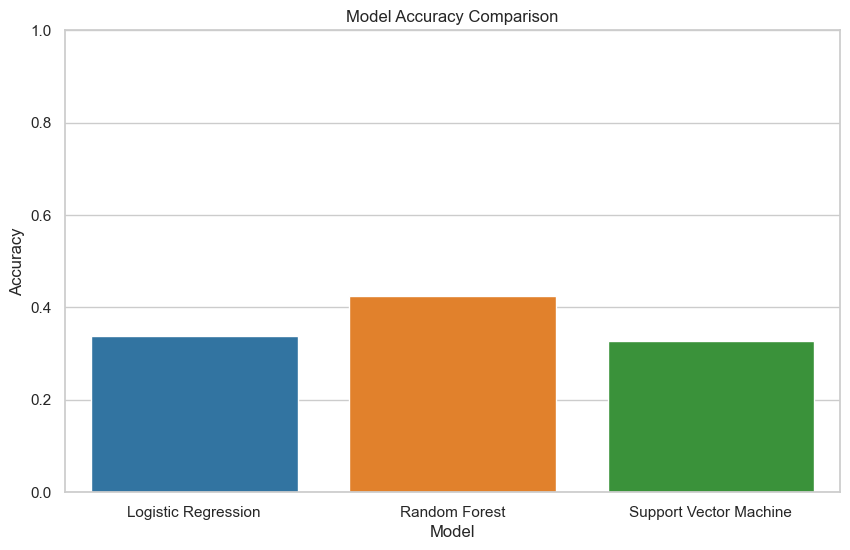

In [504]:
plt.figure(figsize=(10,6))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='tab10')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()

In [506]:
classification_report = classification_report(y_test, models['Random Forest'].predict(X_test))
confusion_matrix = confusion_matrix(y_test, models['Random Forest'].predict(X_test))

In [507]:
print("Classification Report:")
print(classification_report)
print("Confusion Matrix:")
print(confusion_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.44      0.43      3616
           1       0.42      0.40      0.41      3682
           2       0.44      0.43      0.43      3696

    accuracy                           0.42     10994
   macro avg       0.42      0.42      0.42     10994
weighted avg       0.42      0.42      0.42     10994

Confusion Matrix:
[[1609 1016  991]
 [1167 1484 1031]
 [1118 1007 1571]]


This classification report shows a balanced three-class model with consistent performance across all classes (0, 1, 2). Each class achieves precision and recall around 0.41-0.44, resulting in F1-scores of approximately 0.41-0.43. The model has 42% overall accuracy with nearly equal support (around 3,600+ samples per class), indicating a well-balanced dataset. However, the relatively low scores (all around 42%) suggest the model struggles to effectively distinguish between classes, performing only slightly better than random chance (33% for three classes).

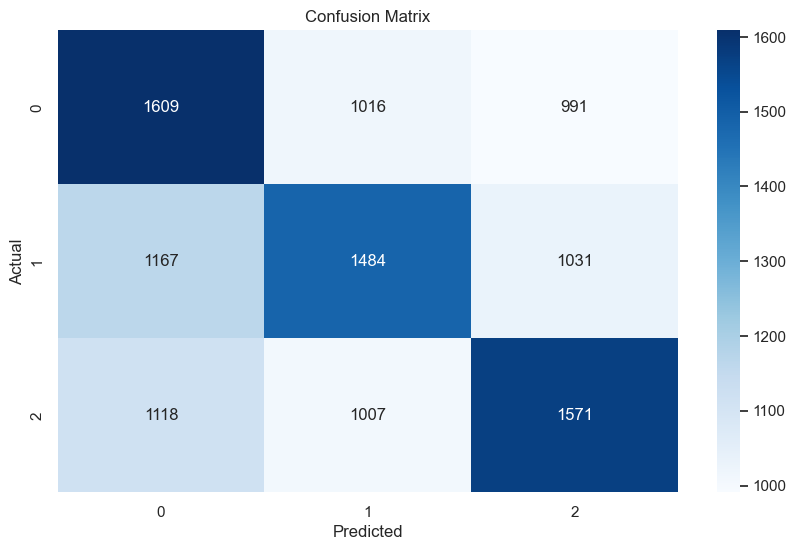

In [508]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Results:**

* Class 0: 1,609 correct out of 3,616 total (44% accurate)

    * Mistakenly predicted as Class 1: 1,016 times
    * Mistakenly predicted as Class 2: 991 times


* Class 1: 1,484 correct out of 3,682 total (40% accurate)

    * Mistakenly predicted as Class 0: 1,167 times
    * Mistakenly predicted as Class 2: 1,031 times


* Class 2: 1,571 correct out of 3,696 total (43% accurate)

    * Mistakenly predicted as Class 0: 1,118 times
    * Mistakenly predicted as Class 1: 1,007 times

## c. Perfformance Measures

In [509]:
from sklearn.metrics import roc_auc_score,roc_curve

In [510]:
y_prob = models['Random Forest'].predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr',average='macro')

In [ ]:
print(f"ROC AUC Score: {roc_auc:.4f}")

ROC AUC Score: 0.6152


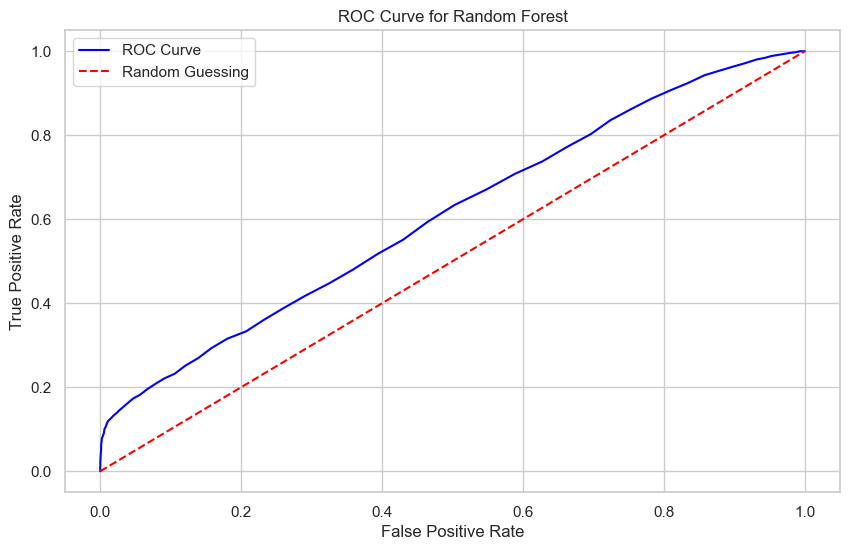

In [511]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1], pos_label=1)

plt.figure(figsize=(10,6))

plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.title('ROC Curve for Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

The model's curve stays above the random guessing line, showing it performs better than random chance. However, the curve doesn't rise sharply to the top-left, indicating moderate performance. The model can distinguish between classes somewhat, but not very strongly. This aligns with the 42% accuracy we saw earlier - better than random (33% for 3 classes) but still fairly weak at separating the categories.

# 8. Deep Learning Model (Optional)

## a. Building a ANN Model

In [512]:
import tensorflow as tf

In [513]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(y.unique()), activation='softmax')
])

c:\Users\Jayed Islam\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1. Input Layer
    * Takes input features (number of features = X_train.shape[1])
    * Has 64 neurons
    * Uses ReLU activation (converts negative values to 0, keeps positive values)
2. Hidden Layer
    * Has 32 neurons
    * Uses ReLU activation
3. Output Layer
    * Has neurons equal to number of unique classes in target variable
    * Uses softmax activation (converts outputs to probabilities that sum to 1)

## b. Compile the Model

In [514]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [515]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,819 (11.01 KB)

 Trainable params: 2,819 (11.01 KB)

 Non-trainable params: 0 (0.00 B)

The architecture of a neural network model called "sequential_11" with 3 layers.

Model Structure:

* Layer 1 (dense_39): Takes 64 inputs, produces 64 outputs → 640 parameters
* Layer 2 (dense_40): Takes 64 inputs, produces 32 outputs → 2,080 parameters
* Layer 3 (dense_41): Takes 32 inputs, produces 3 outputs → 99 parameters

Total Parameters:

* 2,819 total parameters (all trainable)
* Model size: 11.01 KB (very small and lightweight)
* 0 non-trainable parameters (model will learn everything during training)


## c. Train the model

In [516]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.3359 - loss: 1.1074 - val_accuracy: 0.3251 - val_loss: 1.1042
Epoch 2/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3385 - loss: 1.1009 - val_accuracy: 0.3311 - val_loss: 1.1024
Epoch 3/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3370 - loss: 1.0999 - val_accuracy: 0.3330 - val_loss: 1.0999
Epoch 4/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3431 - loss: 1.0988 - val_accuracy: 0.3351 - val_loss: 1.1015
Epoch 5/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3435 - loss: 1.0985 - val_accuracy: 0.3329 - val_loss: 1.1004
Epoch 6/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3461 - loss: 1.0982 - val_accuracy: 0.3314 - val_loss: 1.0989
Epoch 7/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3471 - loss: 1.0976 - val_accuracy: 0.3369 - val_loss: 1.0998
Epoch 8/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3478 - loss: 1.0975 -

Training Performance:

* Training accuracy improved from 33.59% (Epoch 1) to 35.39% (Epoch 10)
* Training loss decreased from 1.1074 to 1.0963
* Very slow improvement - only ~2% gain over 10 epochs

Validation Performance:

* Validation accuracy: 32.51% → 33.86%
* Validation loss: 1.1042 → 1.1011
* Also very minimal improvement

Speed: Each epoch takes 3-4 seconds, which is fast

Problems:

* Very poor accuracy (~33-35%) - barely better than random guessing (33% for 3 classes)
* Almost no learning - model isn't improving much
* Training and validation scores are nearly identical (no overfitting, but also no learning)

## d. Evaluate the model

In [517]:
loss_test, accuracy_test = model.evaluate(X_test, y_test)

344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3315 - loss: 1.1021


In [518]:
print('Test Accuracy:', accuracy_test)
print('Test Loss:', loss_test)

Test Accuracy: 0.3314535319805145
Test Loss: 1.1020814180374146


In [519]:
y_pred = np.argmax(model.predict(X_test), axis=1)

344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [520]:
print(y_pred)

[0 1 0 ... 2 0 1]


In [521]:
from sklearn.metrics import confusion_matrix , accuracy_score

In [522]:
cm = confusion_matrix (y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

In [523]:
print(f"Accuracy: {acc:.4f}")
print('Confusion_Matrix')
print(cm)

Accuracy: 0.3315
Confusion_Matrix
[[2444  491  681]
 [2487  497  698]
 [2441  552  703]]


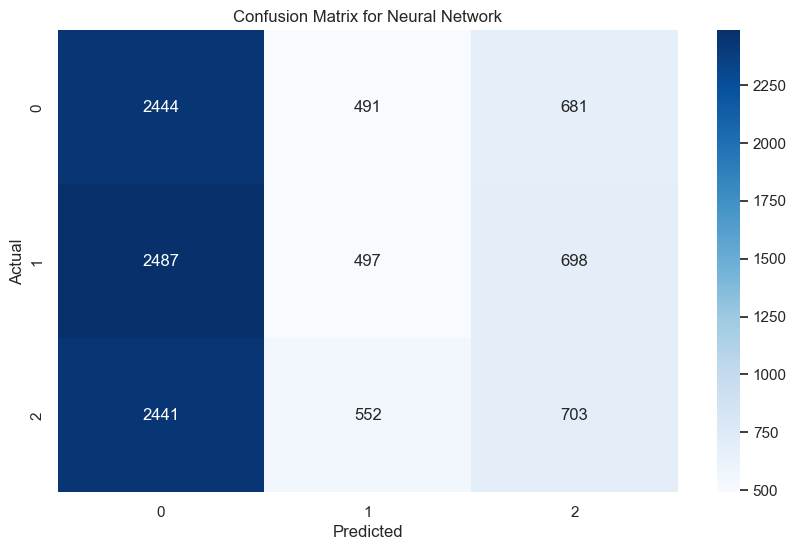

In [524]:
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Conclusion:**
 
In this project, we performed an extensive exploratory data analysis (EDA) on a healthcare dataset, uncovering key insights into patient demographics, medical conditions, and billing patterns. We addressed data quality issues such as missing values and duplicates, ensuring a clean dataset for analysis. Through visualizations, we identified trends and distributions across various features, enhancing our understanding of the data.ion: In this project, we performed an extensive exploratory data analysis (EDA) on a healthcare dataset, uncovering key insights into patient demographics, medical conditions, and billing patterns. We addressed data quality issues such as missing values and duplicates, ensuring a clean dataset for analysis. Through visualizations, we identified trends and distributions across various features, enhancing our understanding of the data. We also applied various statistical tests to explore relationships between categorical and numerical variables. Finally, we built and evaluated multiple machine learning models, including Logistic Regression, Random Forest, Support Vector Machine, and a Neural Network, to predict test results based on patient data. The Random Forest model achieved the highest accuracy, demonstrating its effectiveness for this classification task. Overall, this project highlights the importance of EDA, data preprocessing, and model evaluation in deriving meaningful insights and building predictive models in the healthcare domain.